# ProShares Replication

## HBS Case

### *ProShares Hedge Replication ETF*

***

# Section 2:  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `May 2025`.

-----

## Question 2.1 

For the series in the "hedge fund series" tab, report the following summary statistics:

(a) mean

(b) volatility

(c) Sharpe ratio

Annualize these statistics.

In [1]:
# Question 2.1 (a) Code Here
import pandas as pd

FILE_PATH = "../data/proshares_analysis_data.xlsx"
SHEET = "hedge_fund_series"

# Set first column as a Date index
df = pd.read_excel(FILE_PATH, sheet_name = SHEET)
df = df.rename(columns = {df.columns[0]: "Date"}).set_index("Date")

# Annualise mean (monthly returns * 12)
annualised_mean = df.astype(float).mean() * 12

print(annualised_mean.round(4))

HFRIFWI Index     0.0513
MLEIFCTR Index    0.0385
MLEIFCTX Index    0.0365
HDG US Equity     0.0269
QAI US Equity     0.0288
dtype: float64


In [2]:
# Question 2.1 (b) Code Here
import numpy as np

df = pd.read_excel(FILE_PATH, sheet_name = SHEET)
df = df.rename(columns = {df.columns[0]: "Date"}).set_index("Date")

# Annualise volatility (monthly std * sqrt(12))
annualised_vol = df.astype(float).std(ddof=1) * np.sqrt(12)

print(annualised_vol.round(4))

HFRIFWI Index     0.0588
MLEIFCTR Index    0.0552
MLEIFCTX Index    0.0551
HDG US Equity     0.0574
QAI US Equity     0.0498
dtype: float64


In [3]:
# Question 2.1 (c) Code Here
annualised_sharpe = annualised_mean / annualised_vol

print(annualised_sharpe.round(4))

HFRIFWI Index     0.8722
MLEIFCTR Index    0.6976
MLEIFCTX Index    0.6629
HDG US Equity     0.4684
QAI US Equity     0.5783
dtype: float64


-----

## Question 2.2

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk:

(a) Skewness

(b) Excess Kurtosis (in excess of 3)

(c) VaR (.05) - the fifth quantile of historic returns

(d) CVaR (.05) - the mean of the returns at or below the fifth quantile

(e) Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [4]:
# Question 2.2 (a) Code Here
skewness = df.astype(float).skew()

print(skewness.round(4))

HFRIFWI Index    -0.9483
MLEIFCTR Index   -0.2900
MLEIFCTX Index   -0.2735
HDG US Equity    -0.2749
QAI US Equity    -0.4335
dtype: float64


In [5]:
# Question 2.2 (b) Code Here
excess_kurtosis = df.astype(float).kurt()

print(excess_kurtosis.round(4))

HFRIFWI Index     5.6574
MLEIFCTR Index    1.6309
MLEIFCTX Index    1.5898
HDG US Equity     1.7765
QAI US Equity     1.4492
dtype: float64


In [6]:
# Question 2.2 (c) Code Here
var_05 = df.astype(float).quantile(0.05)

print(var_05.round(4))

HFRIFWI Index    -0.0240
MLEIFCTR Index   -0.0270
MLEIFCTX Index   -0.0270
HDG US Equity    -0.0299
QAI US Equity    -0.0172
Name: 0.05, dtype: float64


In [7]:
# Question 2.2 (d) Code Here
cvar_05 = df.astype(float).apply(lambda x: x[x <= x.quantile(0.05)].mean())

print(cvar_05.round(4))

HFRIFWI Index    -0.0360
MLEIFCTR Index   -0.0350
MLEIFCTX Index   -0.0349
HDG US Equity    -0.0368
QAI US Equity    -0.0310
dtype: float64


In [8]:
# Question 2.2 (e) Code Here

###
### NOTE: NOT COMPLETE YET
###

-----

## Question 2.3

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:

(a) Market Beta

(b) Treynor Ratio

(c) Information ratio

Annualize these three statistics as appropriate.

In [9]:
# Question 2.3 (a) Code Here

In [10]:
# Question 2.3 (b) Code Here

In [11]:
# Question 2.3 (c) Code Here

-----

## Question 2.4

Discuss the previous statistics, and what they tell us about...

(a) the differences between SPY and the hedge-fund series?

(b) which performs better between HDG and QAI.

(c) whether HDG and the ML series capture the most notable properties of HFRI.

### Question 2.4 (a) Answer

Write Answer Here

### Question 2.4 (b) Answer

Write Answer Here

### Question 2.4 (c) Answer

Write Answer Here

-----

## Question 2.5 

Report the correlation matrix for these assets.

(a) Show the correlations as a heat map.

(b) Which series have the highest and lowest correlations?

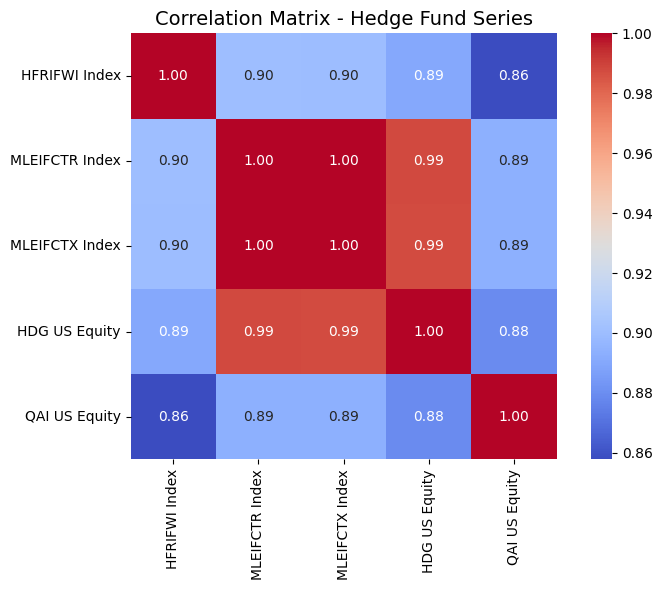

In [12]:
# Question 2.5 (a) Code Here
# Correlation Matrix
corr_matrix = df.astype(float).corr()

# Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix - Hedge Fund Series", fontsize=14)
plt.tight_layout()
plt.show()

In [13]:
# Qustion 2.5 (b) Code Here
# Upper Triangle
corr_pairs = (
    corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
    .stack()
)

# Find the highest and lowest correlation pairs
highest_corr = corr_pairs.idxmax(), corr_pairs.max().round(4)
lowest_corr = corr_pairs.idxmin(), corr_pairs.min().round(4)

print("Highest correlation:", highest_corr)
print("Lowest correlation:", lowest_corr)

Highest correlation: (('MLEIFCTR Index', 'MLEIFCTX Index'), np.float64(0.9999))
Lowest correlation: (('HFRIFWI Index', 'QAI US Equity'), np.float64(0.8578))


-----

## Question 2.6  

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,  

$$
\begin{aligned}
r_t^{\mathrm{HFRI}} &= \alpha^{\mathrm{merr}} + x_t^{\mathrm{merr}}\beta^{\mathrm{merr}} + \epsilon_t^{\mathrm{merr}} \\[6pt]
\hat r_t^{\mathrm{HFRI}} &= \hat\alpha^{\mathrm{merr}} + x_t^{\mathrm{merr}}\hat\beta^{\mathrm{merr}}
\end{aligned}
$$  

Note that the second equation is just our notation for the fitted replication.  

(a) Report the intercept and betas.  

(b) Are the betas realistic position sizes, or do they require huge long-short positions?  

(c) Report the R-squared.  

(d) Report the volatility of $\epsilon^{\mathrm{merr}}$, the tracking error.  


In [14]:
# Question 2.6 (a) Code Here

In [15]:
# Question 2.6 (b) Code Here

In [16]:
# Question 2.6 (c) Code Here

In [17]:
# Question 2.6 (d) Code Here

-----

## Question 2.7  

Let's examine the replication out-of-sample (OOS).  

Starting with $t = 61$ month of the sample, do the following:  

(a) Use the previous 60 months of data to estimate the regression equation.  
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\mathrm{merr}}_{t}$ and $\tilde{\beta}^{\mathrm{merr}}_{t}$.  

(b) Use the estimated regression parameters, along with the time-t regressor values, $x^{\mathrm{merr}}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).  

$$
\hat r_t^{\mathrm{HFRI}} \equiv \tilde{\alpha}^{\mathrm{merr}} + (x_t^{\mathrm{merr}})^\prime \tilde{\beta}^{\mathrm{merr}}
$$  

(c) Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.  

(d) How well does the out-of-sample replication perform with respect to the target?  


In [18]:
# Question 2.7 (a) Code Here

In [19]:
# Question 2.7 (b) Code Here

In [20]:
# Question 2.7 (c) Code Here

In [21]:
# Question 2.7 (d) Code Here